In [1]:
import keras 
from keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 


In [2]:
# Fetch dataset from keras and preprocess function 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def preprocess(x_train, x_test):
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
    print("x_train shape:", x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    # y_train = keras.utils.to_categorical(y_train, 10)
    # y_test = keras.utils.to_categorical(y_test, 10)
    return x_train, x_test

x_train, x_test = preprocess(x_train, x_test)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
def model(input_shape=(28, 28, 1), classes=10):
    X_input = keras.layers.Input(input_shape)
    X = keras.layers.Conv2D(32, (3, 3), padding='same', name = 'conv0')(X_input)
    X = keras.layers.BatchNormalization(axis = 3, name = 'bn0')(X)
    X = keras.layers.Activation('relu')(X)
    X = keras.layers.MaxPooling2D((2, 2), name='max_pool')(X)
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(classes, activation='softmax', name='fc')(X)
    model = keras.models.Model(inputs = X_input, outputs = X, name='model')
    return model

In [4]:
model = model(input_shape=(28, 28, 1), classes=10)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv0 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 bn0 (BatchNormalization)    (None, 28, 28, 32)        128       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 fc (Dense)                  (None, 10)                62730 

In [5]:
# compile model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train model
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.1, shuffle=True)


Epoch 1/5
1688/1688 [==============================] - 9s 3ms/step - loss: 0.1758 - accuracy: 0.9465 - val_loss: 0.1039 - val_accuracy: 0.9692
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0765 - accuracy: 0.9760 - val_loss: 0.0607 - val_accuracy: 0.9830
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0758 - val_accuracy: 0.9813
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0550 - val_accuracy: 0.9840
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.0668 - val_accuracy: 0.9822


In [6]:
# Save model 
model.save('mnist_model.h5')

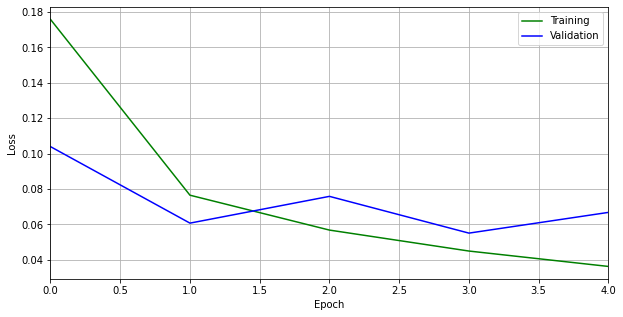

In [7]:
# Plot loss 
plt.figure(figsize=(10, 5))

# loss 

plt.plot(model.history.history['loss'], label='loss', color='green')
plt.plot(model.history.history['val_loss'], label='val_loss', color='blue')

plt.xlim([0.0, model.history.epoch[-1]])
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Training', 'Validation'], loc='upper right')
plt.grid(True)
plt.show(block=False)

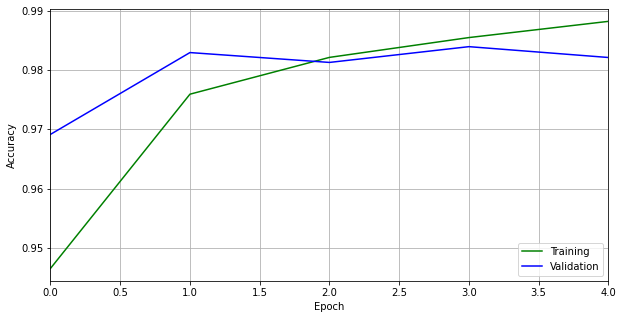

In [8]:
# Plot accuracy

plt.figure(figsize=(10, 5))
plt.plot(model.history.history['accuracy'], label='accuracy', color='green')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy', color='blue')

plt.xlim([0.0, model.history.epoch[-1]])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid(True)
plt.show(block=False)

# Prediction 

In [9]:
mnist_model = keras.models.load_model('mnist_model.h5')

In [10]:
mnist_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv0 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 bn0 (BatchNormalization)    (None, 28, 28, 32)        128       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 fc (Dense)                  (None, 10)                62730 

# Evaluate


In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07561372965574265
Test accuracy: 0.9768000245094299
